In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib
from nibabel.testing import data_path

## Getting filepaths

In [5]:
psea12_bl = np.sort(np.array(os.listdir('data/PSEA12 Baseline')))[1:]
psea12_bl = np.array(['data/PSEA12 Baseline/' + file for file in psea12_bl])
psea12_bl_imgs = psea12_bl[['Mask' not in name for name in psea12_bl]]
psea12_bl_masks = psea12_bl[['Mask' in name for name in psea12_bl]]

In [6]:
psea12_pg = np.sort(np.array(os.listdir('data/PSEA12 PostGel')))[1:]
psea12_pg = np.array(['data/PSEA12 PostGel/' + file for file in psea12_pg])
psea12_pg_imgs = psea12_pg[['Mask' not in name for name in psea12_pg]]
psea12_pg_masks = psea12_pg[['Mask' in name for name in psea12_pg]]

In [7]:
psea12_pmi = np.sort(np.array(os.listdir('data/PSEA12 PostMI')))[1:]
psea12_pmi = np.array(['data/PSEA12 PostMI/' + file for file in psea12_pmi])
psea12_pmi_imgs = psea12_pmi[['Mask' not in name for name in psea12_pmi]]
psea12_pmi_masks = psea12_pmi[['Mask' in name for name in psea12_pmi]]

## Create input image files/masks

In [25]:
input_img_file = 'models/UNet2d/lv_input_imgs'
input_masks_file = 'models/UNet2d/lv_input_masks'

with open(input_img_file, 'w') as f:
    for file in np.concatenate([psea12_bl_imgs, psea12_pg_imgs, psea12_pmi_imgs]):
        f.write('../../' + file + '\n')
        
with open(input_masks_file, 'w') as f:
    for file in np.concatenate([psea12_bl_masks, psea12_pg_masks, psea12_pmi_masks]):
        f.write('../../' + file + '\n')

Images are 300 x 300 x 37

In [8]:
def show_image(filepath, depth):
    image = nib.load(filepath)
    plt.imshow(image.get_fdata()[:,:,depth])

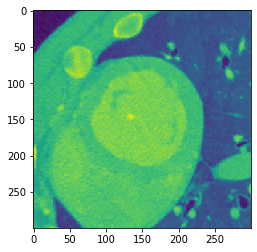

In [9]:
show_image(psea12_bl_imgs[0], 20)

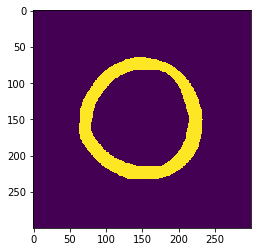

In [10]:
show_image(psea12_bl_masks[0], 20)

In [14]:
nib.load(psea12_bl_masks[0]).get_fdata().max()

1.0